In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1 = pd.read_csv('power_ippt.csv')
data2 = pd.read_csv('power_mppt.csv')

power = pd.concat([data1, data2], ignore_index=True, axis=0)
power

,Time,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,label
0,0.000028,1.572327,101.348877,144.140625,-0.135133,0.490112,-0.354985,41.744537,-149.872894,109.064585,1.000000,50.000000,1.000000,50.000000,F0L
1,0.010027,1.539215,101.251221,143.261719,0.086425,-0.490112,0.349971,-42.311096,149.029083,-108.377482,1.000000,50.000000,1.000000,50.000000,F0L
2,0.020026,1.637604,101.031494,143.554688,-0.155274,0.469971,-0.307988,41.515503,-149.933167,109.104767,1.000000,50.000000,1.000000,50.000000,F0L
3,0.030025,1.577057,101.287842,142.968750,0.106566,-0.456543,0.336543,-42.106171,150.222473,-109.249420,0.461228,49.921509,151.655756,50.078264,F0L
4,0.040024,1.613007,101.049805,143.847656,-0.155274,0.456543,-0.314702,41.370850,-150.162201,109.245402,0.311221,49.594346,154.027080,50.193078,F0L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21631,14.353236,2.363220,87.280273,145.019531,0.542968,-0.718384,0.161982,-125.233612,143.013916,-18.270518,0.700222,49.837684,155.419819,49.997678,F7M
21632,14.363235,2.308350,86.737061,145.312500,-0.631959,0.590820,-0.005864,126.101532,-142.121887,18.503571,0.696735,49.979017,155.409061,50.000249,F7M
21633,14.373234,2.341461,87.103271,145.312500,0.536254,-0.711670,0.168696,-124.751434,142.893372,-18.073629,0.692128,50.219535,155.370171,50.000483,F7M
21634,14.383233,2.426605,87.011719,145.312500,-0.625245,0.584106,0.000850,125.438538,-143.050079,18.379008,0.690443,50.113452,155.363070,49.999983,F7M


In [4]:
pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/bf/45/c961e3cb6ddad76b

   ---------- ----------------------------- 96.7/377.0 MB 1.2 MB/s eta 0:04:04
   ---------- ----------------------------- 96.7/377.0 MB 1.1 MB/s eta 0:04:04
   ---------- ----------------------------- 96.8/377.0 MB 1.1 MB/s eta 0:04:06
   ---------- ----------------------------- 96.8/377.0 MB 1.1 MB/s eta 0:04:06
   ---------- ----------------------------- 96.8/377.0 MB 1.1 MB/s eta 0:04:06
   ---------- ----------------------------- 96.8/377.0 MB 1.1 MB/s eta 0:04:06
   ---------- ----------------------------- 96.8/377.0 MB 1.1 MB/s eta 0:04:06
   ---------- ----------------------------- 96.8/377.0 MB 1.1 MB/s eta 0:04:06
   ---------- ----------------------------- 96.8/377.0 MB 1.1 MB/s eta 0:04:06
   ---------- ----------------------------- 96.8/377.0 MB 1.1 MB/s eta 0:04:06
   ---------- ----------------------------- 96.8/377.0 MB 1.1 MB/s eta 0:04:06
   ---------- ----------------------------- 96.8/377.0 MB 1.1 MB/s eta 0:04:06
   ---------- ----------------------------- 96.8/377

In [5]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [6]:
X = power.drop(columns=['Time','label'])
Y = power['label']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=True)

In [8]:
scaler = StandardScaler()
X_sc_train = scaler.fit_transform(X_train)
X_sc_test = scaler.transform(X_test)

In [11]:
print(X_sc_train.shape)
print(X_sc_test.shape)

(15145, 13)
(6491, 13)


In [22]:
encoder = LabelEncoder()
encoder.fit(y_train)

encoder_y = encoder.transform(y_train)
dummy_ytrain = to_categorical(encoder_y)

encoder_ytest = encoder.transform(y_test)
dummy_ytest = to_categorical(encoder_ytest)

In [23]:
encoder.classes_


array(['F0L', 'F0M', 'F1L', 'F1M', 'F2L', 'F2M', 'F3L', 'F3M', 'F4L',
       'F4M', 'F5L', 'F5M', 'F6L', 'F6M', 'F7L', 'F7M'], dtype=object)

In [24]:
encoder_y

array([11,  6,  3, ...,  5, 10, 14])

In [25]:
to_categorical(encoder_y)[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

### Build ANN

In [16]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from matplotlib import pyplot

In [43]:
inputs_w = X_sc_train.shape[1]
output_y = len(encoder.classes_)

In [44]:
visi = Input(shape=(inputs_w,))
w = Dense(50, activation='relu')(visi)
w = Dense(100, activation='relu')(w)
output = Dense(output_y, activation='softmax')(w)

model = Model(inputs=visi, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 50)                  │             700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │           5,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 16)                  │           1,616 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,416 (28.97 KB)

 Trainable params: 7,416 (28.97 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=40, verbose=1)
history = model.fit(X_sc_train, dummy_ytrain, epochs=100, verbose=2, validation_data=(X_sc_test, dummy_ytest), 
                    callbacks= early_stop, shuffle=True)
model.save('ANN_model_power.h5')

Epoch 1/100
474/474 - 3s - 7ms/step - accuracy: 0.6538 - loss: 1.2179 - val_accuracy: 0.7957 - val_loss: 0.5539
Epoch 2/100
474/474 - 1s - 3ms/step - accuracy: 0.8307 - loss: 0.4565 - val_accuracy: 0.8576 - val_loss: 0.3767
Epoch 3/100
474/474 - 1s - 3ms/step - accuracy: 0.8652 - loss: 0.3499 - val_accuracy: 0.8911 - val_loss: 0.3060
Epoch 4/100
474/474 - 1s - 3ms/step - accuracy: 0.8914 - loss: 0.2919 - val_accuracy: 0.9054 - val_loss: 0.2627
Epoch 5/100
474/474 - 1s - 3ms/step - accuracy: 0.9090 - loss: 0.2490 - val_accuracy: 0.9267 - val_loss: 0.2299
Epoch 6/100
474/474 - 1s - 3ms/step - accuracy: 0.9223 - loss: 0.2174 - val_accuracy: 0.9248 - val_loss: 0.2069
Epoch 7/100
474/474 - 1s - 3ms/step - accuracy: 0.9328 - loss: 0.1966 - val_accuracy: 0.9419 - val_loss: 0.1779
Epoch 8/100
474/474 - 1s - 3ms/step - accuracy: 0.9394 - loss: 0.1767 - val_accuracy: 0.9547 - val_loss: 0.1668
Epoch 9/100
474/474 - 1s - 3ms/step - accuracy: 0.9442 - loss: 0.1627 - val_accuracy: 0.9438 - val_loss:

Epoch 74/100
474/474 - 1s - 3ms/step - accuracy: 0.9840 - loss: 0.0490 - val_accuracy: 0.9758 - val_loss: 0.0809
Epoch 75/100
474/474 - 2s - 3ms/step - accuracy: 0.9838 - loss: 0.0473 - val_accuracy: 0.9757 - val_loss: 0.0871
Epoch 76/100
474/474 - 1s - 3ms/step - accuracy: 0.9845 - loss: 0.0467 - val_accuracy: 0.9770 - val_loss: 0.0786
Epoch 77/100
474/474 - 1s - 3ms/step - accuracy: 0.9861 - loss: 0.0456 - val_accuracy: 0.9804 - val_loss: 0.0731
Epoch 78/100
474/474 - 1s - 3ms/step - accuracy: 0.9835 - loss: 0.0474 - val_accuracy: 0.9774 - val_loss: 0.0840
Epoch 79/100
474/474 - 2s - 3ms/step - accuracy: 0.9861 - loss: 0.0447 - val_accuracy: 0.9807 - val_loss: 0.0665
Epoch 80/100
474/474 - 2s - 5ms/step - accuracy: 0.9844 - loss: 0.0471 - val_accuracy: 0.9789 - val_loss: 0.0702
Epoch 81/100
474/474 - 1s - 3ms/step - accuracy: 0.9842 - loss: 0.0451 - val_accuracy: 0.9809 - val_loss: 0.0667
Epoch 82/100
474/474 - 1s - 3ms/step - accuracy: 0.9849 - loss: 0.0461 - val_accuracy: 0.9797 - 

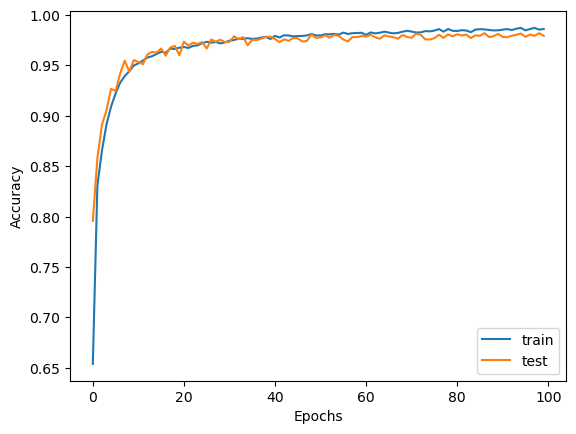

In [46]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [48]:
encoder.inverse_transform([10])

array(['F5L'], dtype=object)

In [49]:
y_pred = model.predict(X_sc_test)
print(y_pred)

203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[1.10887035e-20 5.86110041e-08 2.08411934e-12 ... 3.44207845e-25
  9.99969840e-01 3.70753600e-16]
 [1.82416190e-15 1.46640217e-04 5.16505343e-14 ... 2.56769974e-12
  1.46921850e-10 1.17342006e-05]
 [2.95289582e-16 5.62970897e-08 1.29986544e-15 ... 2.38467285e-20
  9.99069750e-01 7.53699395e-11]
 ...
 [9.30651307e-01 9.53261963e-18 1.87540657e-13 ... 1.43552586e-06
  3.51736078e-24 6.67774184e-21]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.46314030e-10 5.82683415e-11 2.76598905e-04 ... 1.96898595e-30
  2.18365992e-10 6.28560744e-37]]


In [50]:
y_pred = y_pred.argmax(axis=1)
y_pred = encoder.inverse_transform(y_pred)
print(y_pred)

['F7L' 'F1M' 'F7L' ... 'F0L' 'F5M' 'F2L']


In [52]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         F0L       0.97      0.98      0.98       469
         F0M       0.96      0.99      0.98       412
         F1L       0.98      1.00      0.99       394
         F1M       0.98      1.00      0.99       445
         F2L       0.93      0.86      0.89       410
         F2M       1.00      1.00      1.00       425
         F3L       0.95      0.96      0.96       306
         F3M       1.00      0.92      0.96       191
         F4L       1.00      1.00      1.00       442
         F4M       1.00      1.00      1.00       419
         F5L       1.00      0.99      0.99       443
         F5M       0.99      0.99      0.99       419
         F6L       0.97      0.99      0.98       436
         F6M       1.00      1.00      1.00       425
         F7L       0.94      0.98      0.96       427
         F7M       1.00      0.98      0.99       428

    accuracy                           0.98      6491
   macro avg       0.98   

In [55]:
for label in encoder.classes_:
    y_test_label = y_test[y_test == label]
    y_pred_label = y_pred[y_test == label]
    accuracy_label = accuracy_score(y_test_label, y_pred_label)
    print('Accuracy Fault {} : {:.3f}'.format(label, accuracy_label))

Accuracy Fault F0L : 0.979
Accuracy Fault F0M : 0.993
Accuracy Fault F1L : 0.997
Accuracy Fault F1M : 0.998
Accuracy Fault F2L : 0.856
Accuracy Fault F2M : 1.000
Accuracy Fault F3L : 0.961
Accuracy Fault F3M : 0.921
Accuracy Fault F4L : 1.000
Accuracy Fault F4M : 1.000
Accuracy Fault F5L : 0.989
Accuracy Fault F5M : 0.993
Accuracy Fault F6L : 0.986
Accuracy Fault F6M : 0.998
Accuracy Fault F7L : 0.979
Accuracy Fault F7M : 0.979


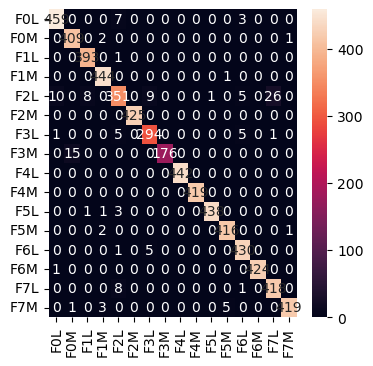

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

plt.figure(figsize=(4,4))
ann = confusion_matrix(y_test, y_pred)
fr = sns.heatmap(ann, annot=True, fmt='d', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.show()

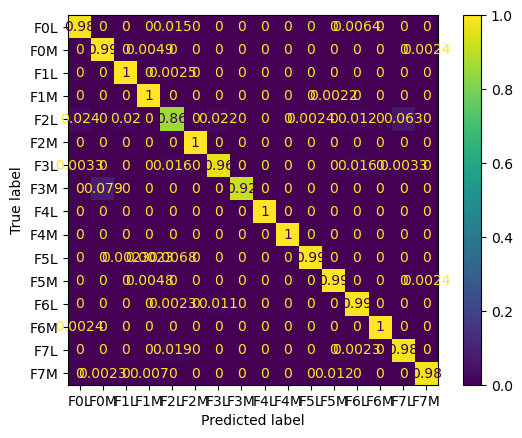

In [57]:
ann_matrix = confusion_matrix(y_test, y_pred)
normals = ann_matrix.astype('float') / ann_matrix.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=normals, display_labels=encoder.classes_)
disp.plot()
plt.show()